In [1]:
import numpy as np
import pickle
np.random.seed(7)  # for reproducibility


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2


Using TensorFlow backend.


In [3]:
import keras
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('tf')

In [4]:
import matplotlib.pyplot as plt
import os
import numpy

In [5]:
def unpickle(file):
    with open(file,'rb') as fo:
        dict=pickle.load(fo, encoding='bytes')
    data=dict['data']
    data = data.reshape((-1, 32, 32, 3))
    labels=dict['label']
    return data, labels

In [6]:
def saveTest(your_predict_labels):
    f=open('testlabel.pickle','rb')
    labels=pickle.load(f)
    f.close()
  #here you must replace the labels that you have predicted for the test set:
    for i in range(len(labels)):
        labels[i]=your_predict_labels[i]
  #save the pickle file that you should upload:
    f=open('testlabel.pickle','wb')
    pickle.dump(labels,f)
    f.close()

In [7]:
X_train_label, Y_train_label =unpickle("trainset.pickle")
print(X_train_label.shape)

(9000, 32, 32, 3)


In [8]:
X_validation_label, Y_validation_label=unpickle("validset.pickle")

In [9]:
f=open('testset.pickle','rb')
dict=pickle.load(f)
f.close()
X_test_label=dict['data']
X_test_label = X_test_label.reshape((-1, 32, 32, 3))
X_test = X_test_label.astype('float32')

print(X_test_label.shape)

(3000, 32, 32, 3)


In [10]:
f=open('testlabel.pickle','rb')
Y_test_label=pickle.load(f)
f.close()
Y_test=np_utils.to_categorical(Y_test_label, 10)


In [11]:
X_train = X_train_label.astype('float32')
X_validation = X_validation_label.astype('float32')


Y_train = np_utils.to_categorical(Y_train_label, 10)
Y_validation = np_utils.to_categorical(Y_validation_label, 10)
print(X_train.shape)

(9000, 32, 32, 3)


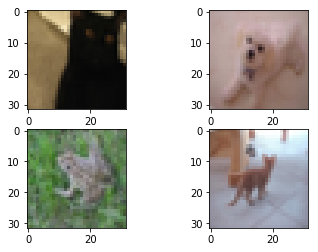

In [12]:
#image visualization
for i in range(4):
    img=X_train_label[i]
    img=img.reshape(-1,32,32).transpose([1,2,0])
    plt.subplot(2,2,i+1)
    plt.imshow(img)


In [13]:
# Parameter
num_classes = Y_train.shape[1]
batch_size = 64
epochs = 100
no_estimators = 5

In [14]:
# create CNN 6 conv layer & 2 Maxpooling layer
def create_cnn_model():
    model = Sequential()
    model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3), activation='relu', border_mode='same'))
    model.add(BatchNormalization())    
    model.add(Dropout(0.2))
    model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same'))
    
    model.add(BatchNormalization())
    model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))

    model.add(BatchNormalization())
    model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation='relu', W_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu', W_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu', W_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy',optimizer='Adam', metrics=['accuracy'])
    return model

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", padding="same")`
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Kera

Instructions for updating:
Use tf.cast instead.


C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 14s - loss: 18.3999 - acc: 0.4576 - val_loss: 7.2984 - val_acc: 0.5787
Epoch 2/100
 - 5s - loss: 4.3203 - acc: 0.5782 - val_loss: 2.4929 - val_acc: 0.5517
Epoch 3/100
 - 5s - loss: 1.9345 - acc: 0.6087 - val_loss: 1.5493 - val_acc: 0.5987
Epoch 4/100
 - 5s - loss: 1.4268 - acc: 0.6198 - val_loss: 1.3085 - val_acc: 0.5857
Epoch 5/100
 - 5s - loss: 1.2806 - acc: 0.6430 - val_loss: 1.1726 - val_acc: 0.6450
Epoch 6/100
 - 5s - loss: 1.1827 - acc: 0.6476 - val_loss: 1.1280 - val_acc: 0.6197
Epoch 7/100
 - 5s - loss: 1.1186 - acc: 0.6562 - val_loss: 1.2440 - val_acc: 0.6233
Epoch 8/100
 - 5s - loss: 1.1091 - acc: 0.6674 - val_loss: 1.2624 - val_acc: 0.6247
Epoch 9/100
 - 5s - loss: 1.1383 - acc: 0.6816 - val_loss: 1.1919 - val_acc: 0.6507
Epoch 10/100
 - 5s - loss: 1.1163 - acc: 0.7006 - val_loss: 1.4040 - val_acc: 0.6137
Epoch 11/100
 - 5s - loss: 1.1168 - acc: 0.6978 - val_loss: 1.2442 - val_acc: 0.6367
Epoch 12/100
 - 5s - los

Epoch 97/100
 - 5s - loss: 0.3157 - acc: 0.9723 - val_loss: 1.4045 - val_acc: 0.7183
Epoch 98/100
 - 5s - loss: 0.3234 - acc: 0.9742 - val_loss: 1.3806 - val_acc: 0.7190
Epoch 99/100
 - 5s - loss: 0.3425 - acc: 0.9676 - val_loss: 1.4975 - val_acc: 0.7180
Epoch 100/100
 - 5s - loss: 0.3368 - acc: 0.9718 - val_loss: 1.3677 - val_acc: 0.7263
3000/3000 [==============================] - 1s 190us/step

Test Accuracy: 0.8120


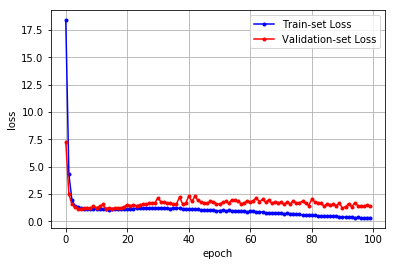

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 14s - loss: 18.7079 - acc: 0.4676 - val_loss: 8.3034 - val_acc: 0.4807
Epoch 2/100
 - 5s - loss: 4.5034 - acc: 0.5800 - val_loss: 2.5471 - val_acc: 0.5677
Epoch 3/100
 - 5s - loss: 2.0702 - acc: 0.5982 - val_loss: 1.6569 - val_acc: 0.5893
Epoch 4/100
 - 5s - loss: 1.4996 - acc: 0.6151 - val_loss: 1.3632 - val_acc: 0.6223
Epoch 5/100
 - 5s - loss: 1.2574 - acc: 0.6433 - val_loss: 1.1823 - val_acc: 0.6480
Epoch 6/100
 - 5s - loss: 1.2073 - acc: 0.6478 - val_loss: 1.1895 - val_acc: 0.6297
Epoch 7/100
 - 5s - loss: 1.1896 - acc: 0.6637 - val_loss: 1.4521 - val_acc: 0.6217
Epoch 8/100
 - 5s - loss: 1.1791 - acc: 0.6723 - val_loss: 1.1803 - val_acc: 0.6533
Epoch 9/100
 - 5s - loss: 1.1227 - acc: 0.6900 - val_loss: 1.2891 - val_acc: 0.6353
Epoch 10/100
 - 5s - loss: 1.1088 - acc: 0.6944 - val_loss: 1.1618 - val_acc: 0.6650
Epoch 11/100
 - 5s - loss: 1.1275 - acc: 0.7036 - val_loss: 1.0886 - val_acc: 0.6813
Epoch 12/100
 - 5s - los

Epoch 97/100
 - 5s - loss: 0.3462 - acc: 0.9707 - val_loss: 1.4992 - val_acc: 0.7040
Epoch 98/100
 - 5s - loss: 0.3508 - acc: 0.9678 - val_loss: 1.4565 - val_acc: 0.7113
Epoch 99/100
 - 5s - loss: 0.3325 - acc: 0.9701 - val_loss: 1.4555 - val_acc: 0.7020
Epoch 100/100
 - 5s - loss: 0.3513 - acc: 0.9668 - val_loss: 1.3302 - val_acc: 0.6917
3000/3000 [==============================] - 1s 176us/step

Test Accuracy: 0.7963


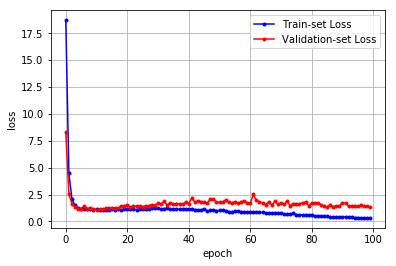

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 13s - loss: 19.8611 - acc: 0.4723 - val_loss: 8.5668 - val_acc: 0.5703
Epoch 2/100
 - 5s - loss: 4.9619 - acc: 0.5832 - val_loss: 2.8977 - val_acc: 0.5080
Epoch 3/100
 - 5s - loss: 2.0531 - acc: 0.6037 - val_loss: 1.7307 - val_acc: 0.5523
Epoch 4/100
 - 5s - loss: 1.4269 - acc: 0.6217 - val_loss: 1.4232 - val_acc: 0.5760
Epoch 5/100
 - 5s - loss: 1.2613 - acc: 0.6263 - val_loss: 1.2061 - val_acc: 0.6250
Epoch 6/100
 - 5s - loss: 1.2032 - acc: 0.6443 - val_loss: 1.2292 - val_acc: 0.5847
Epoch 7/100
 - 5s - loss: 1.1611 - acc: 0.6581 - val_loss: 1.1605 - val_acc: 0.6453
Epoch 8/100
 - 5s - loss: 1.1274 - acc: 0.6739 - val_loss: 1.1455 - val_acc: 0.6620
Epoch 9/100
 - 5s - loss: 1.1264 - acc: 0.6818 - val_loss: 1.1465 - val_acc: 0.6487
Epoch 10/100
 - 5s - loss: 1.1258 - acc: 0.6901 - val_loss: 1.1210 - val_acc: 0.6540
Epoch 11/100
 - 5s - loss: 1.1253 - acc: 0.7017 - val_loss: 1.1896 - val_acc: 0.6670
Epoch 12/100
 - 5s - los

Epoch 97/100
 - 5s - loss: 0.3658 - acc: 0.9653 - val_loss: 1.5898 - val_acc: 0.7100
Epoch 98/100
 - 5s - loss: 0.3351 - acc: 0.9718 - val_loss: 1.3255 - val_acc: 0.7240
Epoch 99/100
 - 5s - loss: 0.3403 - acc: 0.9729 - val_loss: 1.7371 - val_acc: 0.6787
Epoch 100/100
 - 5s - loss: 0.3096 - acc: 0.9713 - val_loss: 1.3065 - val_acc: 0.7263
3000/3000 [==============================] - 1s 186us/step

Test Accuracy: 0.8057


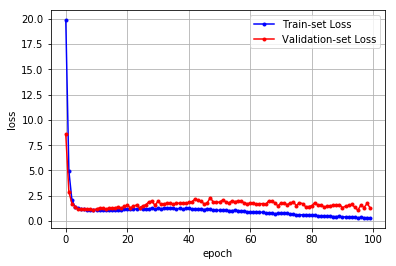

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 14s - loss: 17.7092 - acc: 0.4651 - val_loss: 6.7182 - val_acc: 0.5380
Epoch 2/100
 - 5s - loss: 3.8443 - acc: 0.5784 - val_loss: 2.3587 - val_acc: 0.5543
Epoch 3/100
 - 5s - loss: 1.8335 - acc: 0.5934 - val_loss: 1.5320 - val_acc: 0.6360
Epoch 4/100
 - 5s - loss: 1.3865 - acc: 0.6187 - val_loss: 1.2672 - val_acc: 0.6050
Epoch 5/100
 - 5s - loss: 1.2555 - acc: 0.6317 - val_loss: 1.2778 - val_acc: 0.5950
Epoch 6/100
 - 5s - loss: 1.1634 - acc: 0.6490 - val_loss: 1.1766 - val_acc: 0.6397
Epoch 7/100
 - 5s - loss: 1.1375 - acc: 0.6591 - val_loss: 1.1364 - val_acc: 0.6203
Epoch 8/100
 - 5s - loss: 1.1500 - acc: 0.6640 - val_loss: 1.1829 - val_acc: 0.6330
Epoch 9/100
 - 5s - loss: 1.1312 - acc: 0.6764 - val_loss: 1.1148 - val_acc: 0.6710
Epoch 10/100
 - 5s - loss: 1.1323 - acc: 0.6869 - val_loss: 1.1817 - val_acc: 0.6580
Epoch 11/100
 - 5s - loss: 1.1095 - acc: 0.7072 - val_loss: 1.2186 - val_acc: 0.6460
Epoch 12/100
 - 5s - los

Epoch 97/100
 - 5s - loss: 0.3477 - acc: 0.9727 - val_loss: 1.1945 - val_acc: 0.7350
Epoch 98/100
 - 5s - loss: 0.3298 - acc: 0.9741 - val_loss: 1.3695 - val_acc: 0.7260
Epoch 99/100
 - 5s - loss: 0.3755 - acc: 0.9659 - val_loss: 1.2463 - val_acc: 0.7143
Epoch 100/100
 - 5s - loss: 0.3234 - acc: 0.9740 - val_loss: 1.2741 - val_acc: 0.7203
3000/3000 [==============================] - 1s 174us/step

Test Accuracy: 0.8107


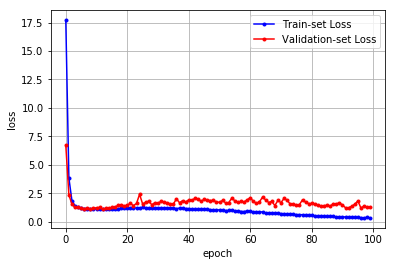

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 15s - loss: 17.6352 - acc: 0.4671 - val_loss: 6.6132 - val_acc: 0.5620
Epoch 2/100
 - 5s - loss: 3.8658 - acc: 0.5838 - val_loss: 2.4144 - val_acc: 0.5700
Epoch 3/100
 - 5s - loss: 1.8756 - acc: 0.6064 - val_loss: 1.4709 - val_acc: 0.6213
Epoch 4/100
 - 5s - loss: 1.4141 - acc: 0.6273 - val_loss: 1.2465 - val_acc: 0.6267
Epoch 5/100
 - 5s - loss: 1.2203 - acc: 0.6537 - val_loss: 1.4329 - val_acc: 0.6183
Epoch 6/100
 - 5s - loss: 1.1759 - acc: 0.6597 - val_loss: 1.1486 - val_acc: 0.6497
Epoch 7/100
 - 5s - loss: 1.1560 - acc: 0.6667 - val_loss: 2.0608 - val_acc: 0.5237
Epoch 8/100
 - 5s - loss: 1.1480 - acc: 0.6813 - val_loss: 1.1732 - val_acc: 0.6880
Epoch 9/100
 - 5s - loss: 1.1474 - acc: 0.6870 - val_loss: 1.2129 - val_acc: 0.6560
Epoch 10/100
 - 5s - loss: 1.1283 - acc: 0.6870 - val_loss: 1.3734 - val_acc: 0.6310
Epoch 11/100
 - 5s - loss: 1.1059 - acc: 0.7112 - val_loss: 1.1548 - val_acc: 0.6490
Epoch 12/100
 - 5s - los

Epoch 97/100
 - 5s - loss: 0.3162 - acc: 0.9684 - val_loss: 1.2928 - val_acc: 0.7130
Epoch 98/100
 - 5s - loss: 0.3525 - acc: 0.9676 - val_loss: 1.2165 - val_acc: 0.7247
Epoch 99/100
 - 5s - loss: 0.3211 - acc: 0.9710 - val_loss: 1.2269 - val_acc: 0.7163
Epoch 100/100
 - 5s - loss: 0.3217 - acc: 0.9723 - val_loss: 1.5087 - val_acc: 0.7140
3000/3000 [==============================] - 1s 177us/step

Test Accuracy: 0.8023


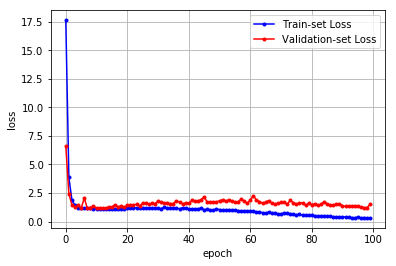

In [15]:
## ENSEMBLE MODELS
# Train many CNN models
for i in np.arange(no_estimators):
    # check point to save best model
    checkpoint = keras.callbacks.ModelCheckpoint('models_7/model_'+str(i)+'.h5', monitor='val_acc', \
            verbose=0, save_best_only=True, save_weights_only=True, mode='auto')
    # clear GPU memory
    model = None
    K.clear_session()
    
    # train model
    model = create_cnn_model()
    history=model.fit(X_train, Y_train, validation_data=(X_validation, Y_validation), nb_epoch=100, \
                batch_size=64, verbose=2, callbacks=[checkpoint])
    print("\nTest Accuracy: {:.4f}".format(model.evaluate(X_test, Y_test)[1]))
    y_vloss=history.history['val_loss']
    y_loss=history.history['loss']
    
    x_len=numpy.arange(len(y_loss))
    plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
    plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
    
    plt.legend(loc='upper right')
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

In [16]:
# Check individual scores - val_acc and get list of the best models
score_list = []
score_list2 = []
score_list3=[]
model = create_cnn_model()
for i in np.arange(no_estimators):    
    model.load_weights('models_7/model_'+str(i)+'.h5')
    scores3= model.evaluate(X_test, Y_test, verbose=0)
    scores2= model.evaluate(X_train, Y_train, verbose=0)
    scores = model.evaluate(X_validation, Y_validation, verbose=0)
    score_list.append(scores[1])   #validation Acc
    score_list2.append(scores2[1])    #Train Acc
    score_list3.append(scores3[1])  #Test Acc
score_list = np.array(score_list)
score_list2= np.array(score_list2)
score_list3= np.array(score_list3)
score_list_filter = score_list >= 0.71 # threshold to select best model
print("Train Acc: "+str(score_list2))
print("Validation Acc: "+ str(score_list))
print("Test Acc: "+ str(score_list3))

print(score_list_filter)

C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_l

Train Acc: [0.99722222 0.99566667 0.99522222 0.99677778 0.95477778]
Validation Acc: [0.73133333 0.724      0.734      0.73666667 0.73033333]
Test Acc: [0.81233333 0.811      0.81133333 0.81466667 0.81233333]
[ True  True  True  True  True]


In [17]:
# Ensemble predictions ~ val_err 16%
predictions = np.zeros((Y_validation.shape[0],Y_validation.shape[1]))
predictions_test=np.zeros((Y_test.shape[0],Y_test.shape[1]))
model = create_cnn_model()
for i in np.arange(no_estimators): 
    if score_list_filter[i] == False:
        continue
    #validation
    model.load_weights('models_7/model_'+str(i)+'.h5')
    prediction = model.predict_classes(X_validation, batch_size=200, verbose=0)
    prediction_onehot = np_utils.to_categorical(prediction, 10)
    predictions = predictions + prediction_onehot*score_list[i]
    #Test
    prediction_test = model.predict_classes(X_test, batch_size=200, verbose=0)
    prediction_onehot_test = np_utils.to_categorical(prediction_test, 10)
    predictions_test = predictions_test + prediction_onehot_test*score_list3[i]

predictions_label = np.argmax(predictions, axis=1)
evaluate = np.equal(predictions_label, Y_validation_label)

predictions_label_test = np.argmax(predictions_test, axis=1)
evaluate_test = np.equal(predictions_label_test, Y_test_label)

print("Ensemble Validation_Error: %.2f%%" % (100-np.mean(evaluate)*100))
print("Ensemble Validation_Accuracy: %.2f%%" % (np.mean(evaluate)*100))

print("Ensemble Test_Error: %.2f%%" % (100-np.mean(evaluate_test)*100))
print("Ensemble Test_Accuracy: %.2f%%" % (np.mean(evaluate_test)*100))

C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_l

Ensemble Validation_Error: 23.07%
Ensemble Validation_Accuracy: 76.93%
Ensemble Test_Error: 12.93%
Ensemble Test_Accuracy: 87.07%


In [ ]:
## PERFORM PREDICTION ON TEST SET

X_test = X_test_label.astype('float32')

predictions = np.zeros((Y_validation.shape[0],Y_validation.shape[1]))
model = create_cnn_model()
for i in np.arange(no_estimators): 
    if score_list_filter[i] == False: # skip bad model
        continue
    model.load_weights('models_7/model_'+str(i)+'.h5')
    prediction = model.predict_classes(X_test, batch_size=200, verbose=0)
    prediction_onehot = np_utils.to_categorical(prediction, 10)
    predictions = predictions + prediction_onehot*score_list[i]

predictions_label = np.argmax(predictions, axis=1)
output = predictions_label.tolist()

with open('testlabel.pickle','wb') as f:
    pickle.dump(output, f)

pred = model.evaluate(X_test, Y_test)
print("test loss: ",pred[0]+"test acc: ",pred[1])